In [1]:
# Se debe limpiar la base de datos para que las dimensiones de entradas y salidas coincidadn
import pandas as pd
import RNN_Ale as RNN
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# First 2 files to analyzed
path_Input = 'platform_tests_first_part\matrix_0\matrix_0_input.csv'
path_Output = 'platform_tests_first_part_euler\matrix_0\matrix_0_output_LHR-92216C00.csv'

In [3]:
Input = pd.read_csv(path_Input,sep=';')
Output = pd.read_csv(path_Output,sep=';')


In [4]:
roll = Input['Roll'].to_numpy()
pitch = Input['Pitch'].to_numpy()
heave = Input['Heave'].to_numpy()
timeInput = Input['Timestamp'].to_numpy()
timeStampInput = []
# Convert time to integer
for date in timeInput:
    var = dt.datetime.strptime(date,'%Y-%m-%dT%H:%M:%S.%f')
    timeStampInput.append(var)


In [5]:
# angularV = Output['AngularVelocity'].tolist()
# xAngVel = []
# yAngVel = []
# zAngVel = []
# for item in angularV:
#     my_tuple = eval(item)
#     xAngVel.append(my_tuple[0])
#     yAngVel.append(my_tuple[1])
#     zAngVel.append(my_tuple[2])

Position = Output['Position'].tolist()

xPosition = []
yPosition = []
zPosition = []

for item in Position:
    my_tuple = eval(item)
    xPosition.append(my_tuple[0])
    yPosition.append(my_tuple[1])
    zPosition.append(my_tuple[2])

rotation = Output['Rotation'].tolist()
aRotation = []
bRotation = []
cRotation = []
# dRotation = []
for item in rotation:
    my_tuple = eval(item)
    aRotation.append(my_tuple[0])
    bRotation.append(my_tuple[1])
    cRotation.append(my_tuple[2])
#     dRotation.append(my_tuple[3])

# velocity = Output['Velocity'].tolist()
# xVel = []
# yVel = []
# zVel = []
# for item in velocity:
#     my_tuple = eval(item)
#     xVel.append(my_tuple[0])
#     yVel.append(my_tuple[1])
#     zVel.append(my_tuple[2])


timeOutput = Output['Timestamp'].tolist()
timeStampOutput = []
# Convert time to integer
for date in timeOutput:
    var = dt.datetime.strptime(date,'%Y-%m-%dT%H:%M:%S.%f')
    timeStampOutput.append(var)



In [6]:
# I need to compare the inputs adquistion against the output adquisition
cont2 = 0 

inputIX = []
newRoll = []
newPitch = []
newHeave = []

outputIX = []
# newXAngVel = []
# newYAngVel = []
# newZAngVel = []
newXPosition = []
newYPosition = []
newZPosition = []
newARotation = []
newBRotation = []
newCRotation = []
# newDRotation = []
# newXVel = []
# newYVel = []
# newZVel = []

for item in timeStampInput:
    cont = 0
    flag = 0
    for otherItem in timeStampOutput:
        if(item == otherItem):
            inputIX.append(timeStampInput[cont2])
            newRoll.append(roll[cont2])
            newPitch.append(pitch[cont2])
            newHeave.append(heave[cont2])
            outputIX.append(timeStampOutput[cont])
#             newXAngVel.append(xAngVel[cont])
#             newYAngVel.append(yAngVel[cont])
#             newZAngVel.append(zAngVel[cont])
            newXPosition.append(xPosition[cont])
            newYPosition.append(yPosition[cont])
            newZPosition.append(zPosition[cont])
            newARotation.append(aRotation[cont])
            newBRotation.append(bRotation[cont])
            newCRotation.append(cRotation[cont])
#             newDRotation.append(dRotation[cont])
#             newXVel.append(xVel[cont])
#             newYVel.append(yVel[cont])
#             newZVel.append(zVel[cont])
            cont += 1
            cont2 += 1
            flag = 1
        else:
            cont += 1
    if (flag == 0):
        cont2 += 1


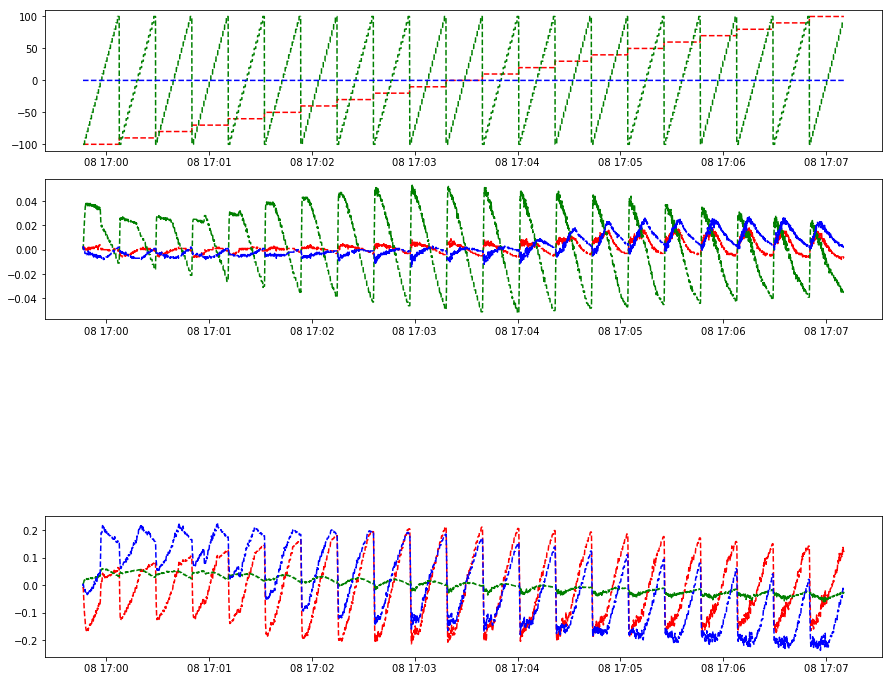

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(511)
plt.plot_date(outputIX,newRoll,'r--')
plt.plot_date(outputIX,newPitch,'g--')
plt.plot_date(outputIX,newHeave,'b--')
plt.subplot(512)
# plt.plot_date(outputIX,newXAngVel,'r--')
# plt.plot_date(outputIX,newYAngVel,'g--')
# plt.plot_date(outputIX,newZAngVel,'b--')
# plt.subplot(513)
plt.plot_date(outputIX,newXPosition,'r--')
plt.plot_date(outputIX,newYPosition,'g--')
plt.plot_date(outputIX,newZPosition,'b--')
plt.subplot(514)
plt.plot_date(outputIX,newARotation,'r--')
plt.plot_date(outputIX,newBRotation,'g--')
plt.plot_date(outputIX,newCRotation,'b--')
# plt.plot_date(outputIX,newDRotation,'k--')
# plt.subplot(515)
# plt.plot_date(outputIX,newXVel,'r--')
# plt.plot_date(outputIX,newYVel,'g--')
# plt.plot_date(outputIX,newZVel,'b--')
plt.show()

In [8]:
# Concatenate into an input
u1 = np.reshape(np.array(newRoll),(1,1,-1))
u2 = np.reshape(np.array(newPitch),(1,1,-1))
u3 = np.reshape(np.array(newHeave),(1,1,-1))
##########################################
# x1 = np.reshape(np.array(newXAngVel),(1,1,-1))
# x2 = np.reshape(np.array(newYAngVel),(1,1,-1))
# x3 = np.reshape(np.array(newZAngVel),(1,1,-1))
##########################################
x4 = np.reshape(np.array(newXPosition),(1,1,-1))
x5 = np.reshape(np.array(newYPosition),(1,1,-1))
x6 = np.reshape(np.array(newZPosition),(1,1,-1))
##########################################
x7 = np.reshape(np.array(newARotation),(1,1,-1))
x8 = np.reshape(np.array(newBRotation),(1,1,-1))
x9 = np.reshape(np.array(newCRotation),(1,1,-1))
# x10 = np.reshape(np.array(newDRotation),(1,1,-1))
##########################################
# x11 = np.reshape(np.array(newXVel),(1,1,-1))
# x12 = np.reshape(np.array(newYVel),(1,1,-1))
# x13 = np.reshape(np.array(newZVel),(1,1,-1))
##########################################
u = np.concatenate((u1,u2,u3),axis = 0)
# X = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13),axis = 0)
X = np.concatenate((x4,x5,x6,x7,x8,x9),axis = 0)
print(np.shape(u))
print(np.shape(X))


(3, 1, 4428)
(6, 1, 4428)


In [9]:
# Common RNN Parameters
T = len(inputIX)
uSize = 3
stateSize = 6

In [10]:
# Single Layer Recurrent Neural network
np.random.seed(2) # For repetibility purposes

# RNN Parameters
A = np.identity(stateSize)*0.97
P = np.identity(stateSize)*1

# Initialize vector
xhR1 = np.zeros((stateSize,1,T))
# Neuron number
nn1R1 = 6
nn2R1 = 6
# Weights
W1R1 = np.zeros((stateSize,nn1R1,T))
W1R1[:,:,0:3] = (np.random.random((stateSize,nn1R1,3))*2-1)*0.1#For first traning
c1R1 = np.identity(stateSize)

W2R1 = np.zeros((stateSize,nn2R1,T))
W2R1[:,:,0:3] = (np.random.random((stateSize,nn2R1,3))*2-1)*0.1#For first training
c2R1 = np.identity(stateSize)

# Identification error
deltaR1 = np.zeros((stateSize,1,T))
#Training
g1R1 = 100
g2R1 = 100

partial = 10

for training in range(1):
    Loss1=np.zeros(T-1)
    for i in range(2,T-1):
        U=u[:,:,i]
        #Single Layer
        deltaR1[:,:,i] = X[:,:,i]-xhR1[:,:,i]
        Loss1[i] = np.sqrt(np.sum(np.square(deltaR1[:,:,i])))
        W1R1[:,:,i+1] = RNN.LAW1(W1R1[:,:,i],deltaR1[:,:,i],g1R1,P,A,RNN.functionSigma(xhR1[:,:,i],nn1R1,c1R1),partial)
        W2R1[:,:,i+1] = RNN.LAW1(W2R1[:,:,i],deltaR1[:,:,i],g2R1,P,A,RNN.functionPhi(xhR1[:,:,i],nn2R1,uSize,c2R1)@U,partial)
        xhR1[:,:,i+1] = (A@xhR1[:,:,i] + 0.5*(W1R1[:,:,i+1]+W1R1[:,:,i])@RNN.functionSigma(xhR1[:,:,i],nn1R1,c1R1)
                       + 0.5*(W2R1[:,:,i+1]+W2R1[:,:,i])@RNN.functionPhi(xhR1[:,:,i],nn2R1,uSize,c2R1)@U)


print(np.sum(Loss1))


88.19007867622429


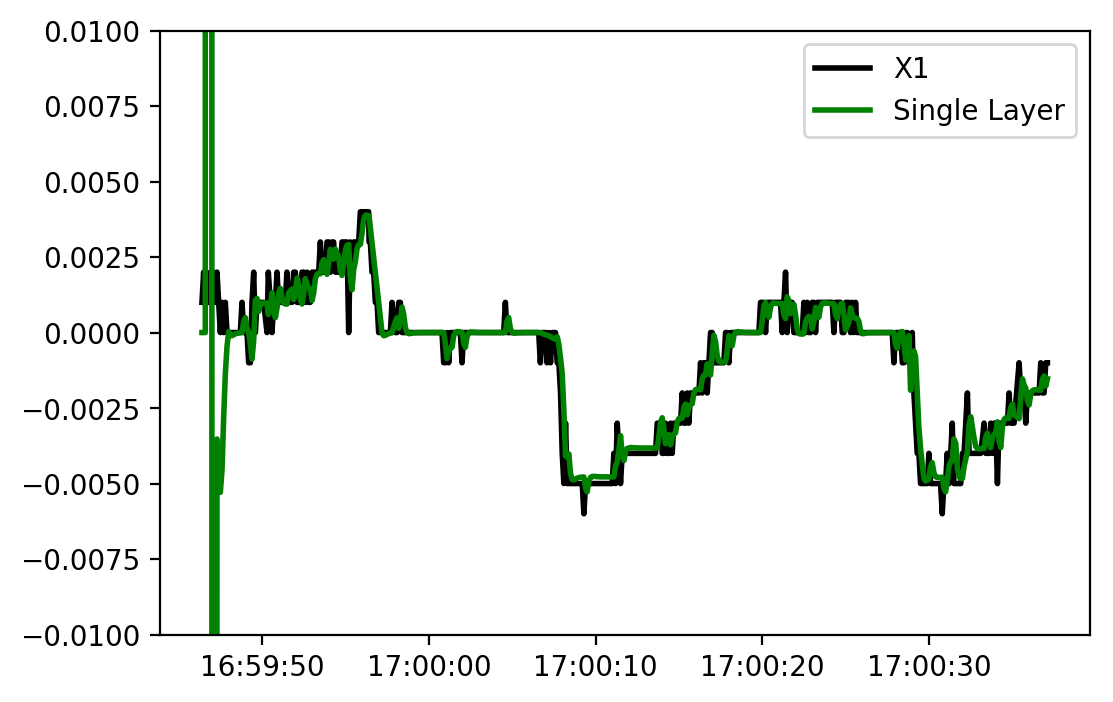

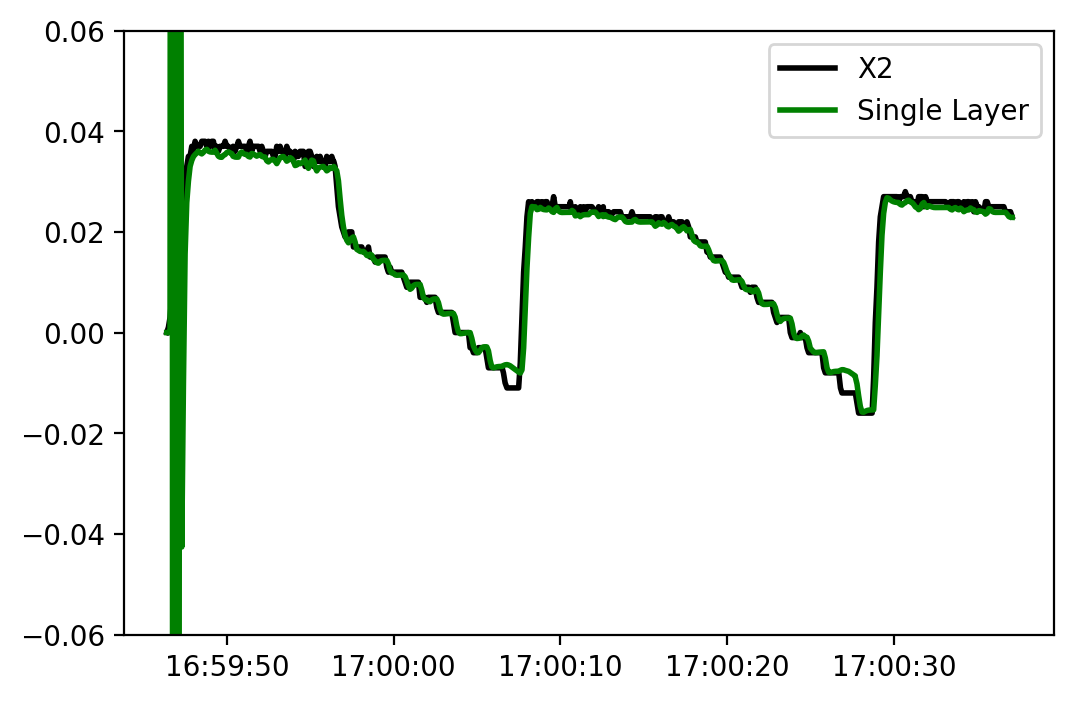

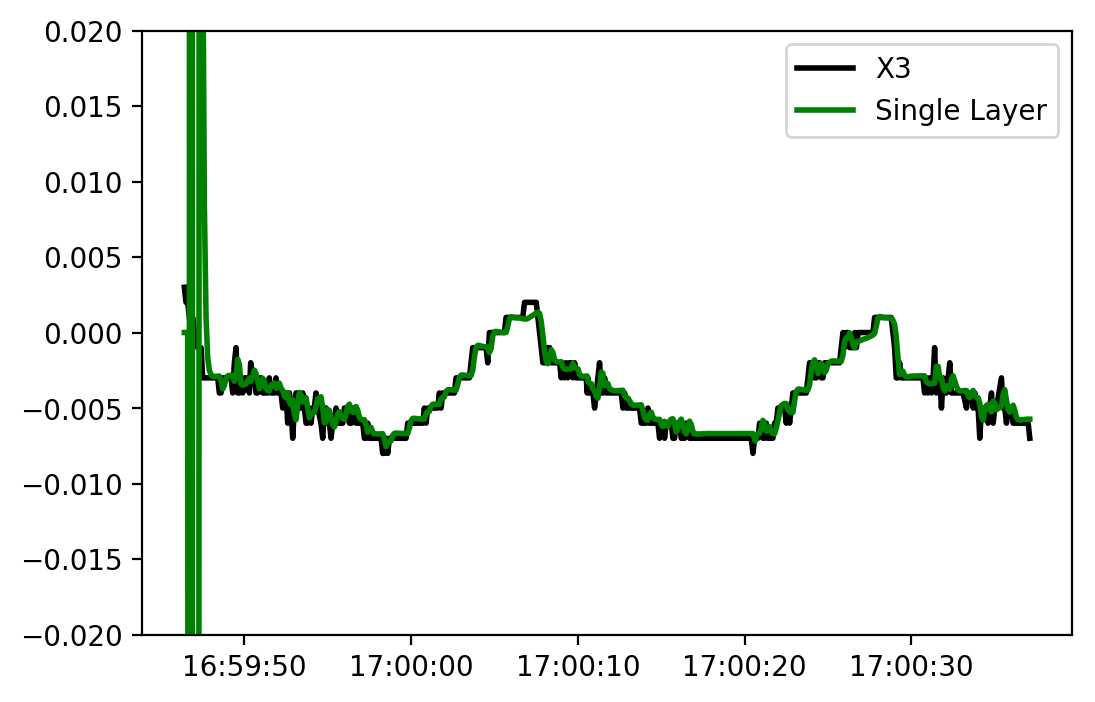

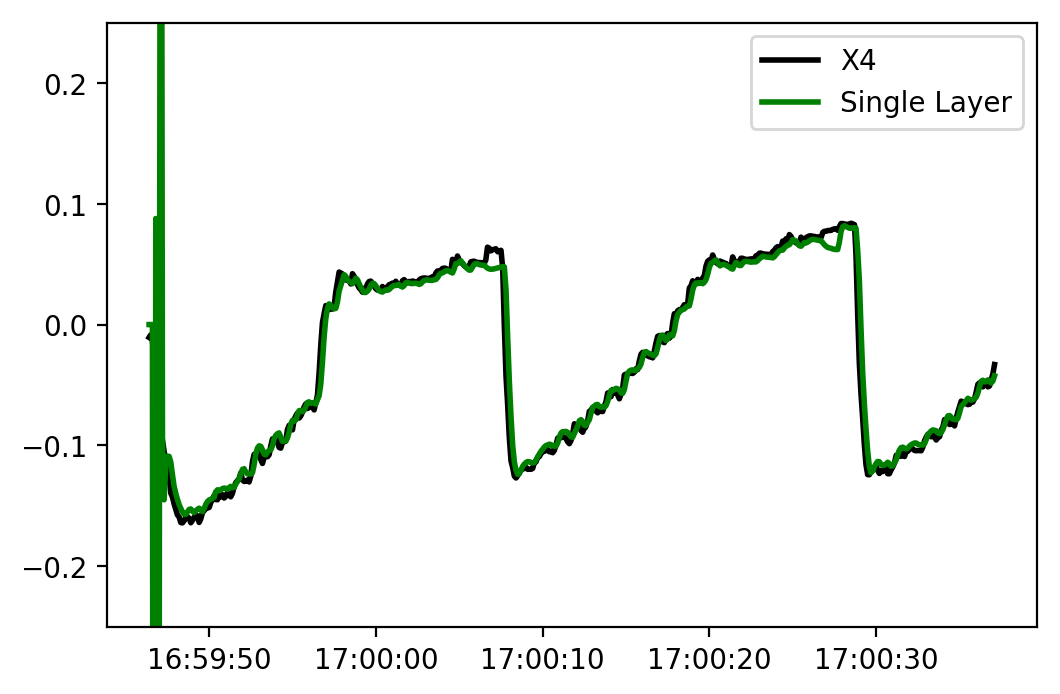

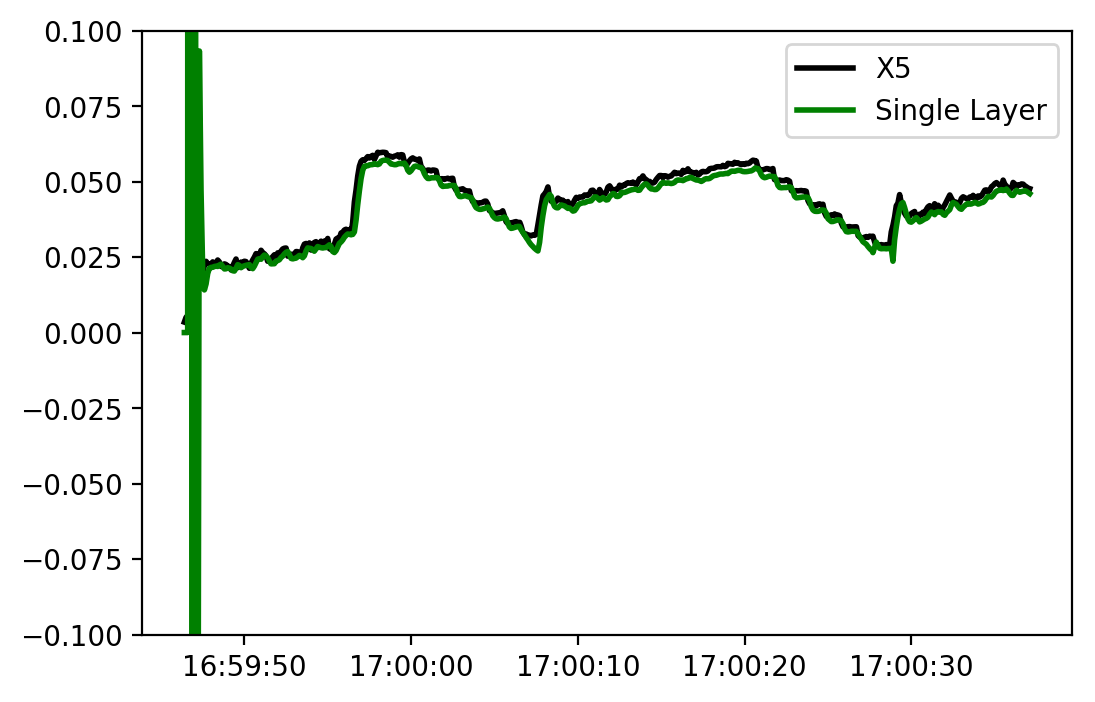

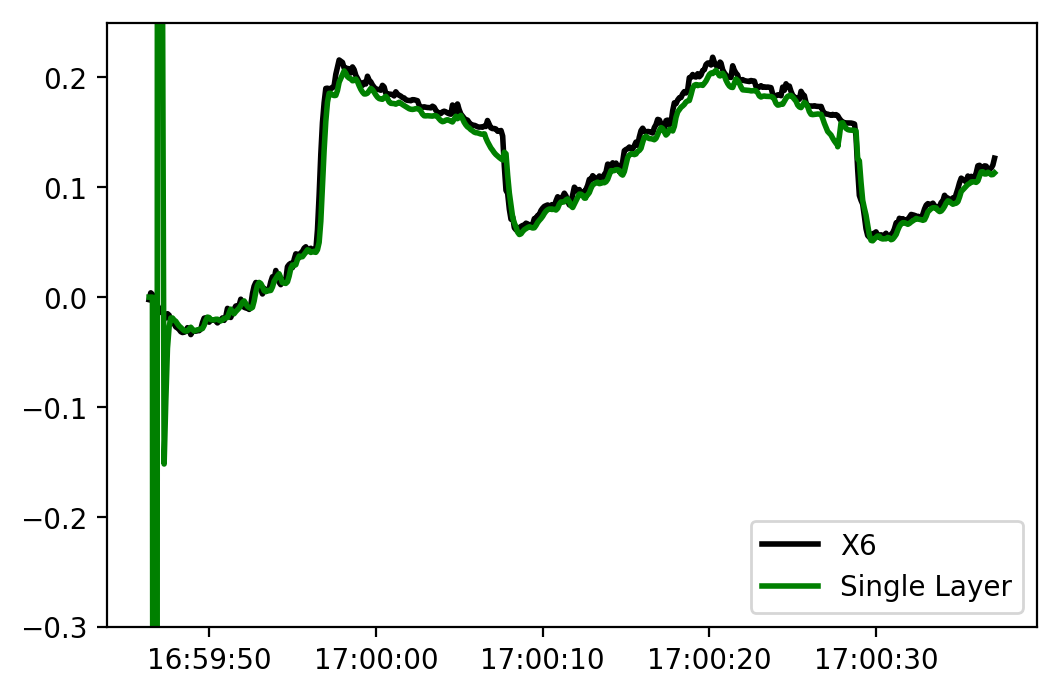

In [20]:

xlim = 500

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[0,0,:xlim], 'k',linewidth=2,linestyle='-',label='X1')
plt.plot_date(inputIX[:xlim],xhR1[0,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
plt.ylim(-0.01,0.01)
plt.legend()
plt.savefig("X1_IdentifierSLRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[1,0,:xlim], 'k',linewidth=2,linestyle='-',label='X2')
plt.plot_date(inputIX[:xlim],xhR1[1,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
plt.ylim(-0.06,0.06)
plt.legend()
plt.savefig("X2_IdentifierSLRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[2,0,:xlim], 'k',linewidth=2,linestyle='-',label='X3')
plt.plot_date(inputIX[:xlim],xhR1[2,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
plt.ylim(-0.02,0.02)
plt.legend()
plt.savefig("X3_IdentifierSLRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[3,0,:xlim], 'k',linewidth=2,linestyle='-',label='X4')
plt.plot_date(inputIX[:xlim],xhR1[3,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
plt.ylim(-0.25,0.25)
plt.legend()
plt.savefig("X4_IdentifierSLRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[4,0,:xlim], 'k',linewidth=2,linestyle='-',label='X5')
plt.plot_date(inputIX[:xlim],xhR1[4,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
plt.ylim(-0.1,0.1)
plt.legend()
plt.savefig("X5_IdentifierSLRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[5,0,:xlim], 'k',linewidth=2,linestyle='-',label='X6')
plt.plot_date(inputIX[:xlim],xhR1[5,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
plt.ylim(-0.3,0.25)
plt.legend()
plt.savefig("X6_IdentifierSLRNN.png")

# plt.figure(figsize=[6,4],dpi=200)
# plt.plot_date(inputIX[:xlim],X[6,0,:xlim], 'k',linewidth=2,linestyle='-',label='X7')
# plt.plot_date(inputIX[:xlim],xhR1[6,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
# plt.ylim(-0.2,0.2)
# plt.legend()
# plt.savefig("X7_IdentifierSLRNN.png")

# plt.figure(figsize=[6,4],dpi=200)
# plt.plot_date(inputIX[:xlim],X[7,0,:xlim], 'k',linewidth=2,linestyle='-',label='X8')
# plt.plot_date(inputIX[:xlim],xhR1[7,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
# plt.ylim(-0.5,-0.4)
# plt.legend()
# plt.savefig("X8_IdentifierSLRNN.png")

# plt.figure(figsize=[6,4],dpi=200)
# plt.plot_date(inputIX[:xlim],X[8,0,:xlim], 'k',linewidth=2,linestyle='-',label='X9')
# plt.plot_date(inputIX[:xlim],xhR1[8,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
# plt.ylim(-0.1,0.1)
# plt.legend()
# plt.savefig("X9_IdentifierSLRNN.png")

# plt.figure(figsize=[6,4],dpi=200)
# plt.plot_date(inputIX[:xlim],X[9,0,:xlim], 'k',linewidth=2,linestyle='-',label='X10')
# plt.plot_date(inputIX[:xlim],xhR1[9,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
# plt.ylim(-0.9,-0.8)
# plt.legend()
# plt.savefig("X10_IdentifierSLRNN.png")

# plt.figure(figsize=[6,4],dpi=200)
# plt.plot_date(inputIX[:xlim],X[10,0,:xlim], 'k',linewidth=2,linestyle='-',label='X11')
# plt.plot_date(inputIX[:xlim],xhR1[10,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
# plt.ylim(-0.03,0.02)
# plt.legend()
# plt.savefig("X11_IdentifierSLRNN.png")

# plt.figure(figsize=[6,4],dpi=200)
# plt.plot_date(inputIX[:xlim],X[11,0,:xlim], 'k',linewidth=2,linestyle='-',label='X12')
# plt.plot_date(inputIX[:xlim],xhR1[11,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
# plt.ylim(-0.05,0.2)
# plt.legend()
# plt.savefig("X12_IdentifierSLRNN.png")

# plt.figure(figsize=[6,4],dpi=200)
# plt.plot_date(inputIX[:xlim],X[12,0,:xlim], 'k',linewidth=2,linestyle='-',label='X13')
# plt.plot_date(inputIX[:xlim],xhR1[12,0,:xlim],'g',linewidth=2,linestyle='-',label='Single Layer')
# plt.ylim(-0.02,0.02)
# plt.legend()
# plt.savefig("X13_IdentifierSLRNN.png")


In [21]:
############################################################################################################
#Two-Layer
####################################
np.random.seed(1)
A2 = np.identity(stateSize)*0.99
P2 = np.identity(stateSize)*1
xhR2 = np.zeros((stateSize,1,T))
nn1R2 = 6
nn2R2 = 6
W1R2 = np.zeros((stateSize,nn1R2,T))
W1R2[:,:,0:3] = (np.random.random((stateSize,nn1R2,3))*2-1)*0.1#For first traning
W2R2= np.zeros((stateSize,nn2R2,T))
W2R2[:,:,0:3] = (np.random.random((stateSize,nn2R2,3))*2-1)*0.1#For first training
#Second layer
nn21R2=6
nn22R2=6
# Coefficient c for the activation function
#c21R2 = np.random.uniform(-2,2,(nn21R2,nn1R2))*1
# Lo cambie por la matriz identidad a ver que show
c21R2 = np.identity(nn1R2)
#c22R2 = np.random.uniform(-2,2,(nn22R2,nn2R2))*1
c22R2 = np.identity(nn2R2)
#Tunning :P
#Weights
W21R2 = np.zeros((nn21R2,stateSize,T))
W21R2[:,:,0:3] = (np.random.random((nn21R2,stateSize,3))*2-1)*0.1#For first traning
W22R2 = np.zeros((nn22R2,stateSize,T))
W22R2[:,:,0:3] = (np.random.random((nn22R2,stateSize,3))*2-1)*0.1#For first training
#Error
deltaR2 = np.zeros((stateSize,1,T))
#Training
g1R2 = 100
g2R2 = 100
g12R2 = 50
g22R2 = 50

partial = 10

for training in range(1):
    Loss2=np.zeros(T-1)
    for i in range(2,T-1):
        U=u[:,:,i]
        #Two Layer
        ############################################################################################
        deltaR2[:,:,i] = -xhR2[:,:,i]+X[:,:,i]
        Loss2[i] = np.sqrt(np.sum(np.square(deltaR2[:,:,i])))
        X_W12R2= 0.5*(W21R2[:,:,i]+W21R2[:,:,i-1])@xhR2[:,:,i-1]
        X_W22R2= 0.5*(W22R2[:,:,i]+W22R2[:,:,i-1])@xhR2[:,:,i-1]
        DsigR2 = RNN.DSigma(X_W12R2,nn1R2,c21R2)
        DphiR2 = RNN.DPhi(X_W22R2,nn2R2,U,c22R2)
        W21R2[:,:,i+1] = RNN.LAW2(W21R2[:,:,i],W1R2[:,:,0],deltaR2[:,:,i],g12R2,P2,xhR2[:,:,i],A2,nn21R2,DsigR2)
        W22R2[:,:,i+1] = RNN.LAW2(W22R2[:,:,i],W2R2[:,:,0],deltaR2[:,:,i],g22R2,P2,xhR2[:,:,i],A2,nn22R2,DphiR2)
        X_W12R2= 0.5*(W21R2[:,:,i+1]+W21R2[:,:,i])@xhR2[:,:,i]
        X_W22R2= 0.5*(W22R2[:,:,i+1]+W22R2[:,:,i])@xhR2[:,:,i]
        W1R2[:,:,i+1] = RNN.LAW1(W1R2[:,:,i],deltaR2[:,:,i],g1R2,P2,A2,RNN.functionSigma(X_W12R2,nn1R2,c21R2),partial)
        W2R2[:,:,i+1] = RNN.LAW1(W2R2[:,:,i],deltaR2[:,:,i],g2R2,P2,A2,RNN.functionPhi(X_W22R2,nn2R2,uSize,c22R2)@U,partial)
        xhR2[:,:,i+1] = (A2@xhR2[:,:,i] + 0.5*(W1R2[:,:,i+1]+W1R2[:,:,i])@RNN.functionSigma(X_W12R2,nn1R2,c21R2)
                       + 0.5*(W2R2[:,:,i+1]+W2R2[:,:,i])@RNN.functionPhi(X_W22R2,nn2R2,uSize,c22R2)@U)


print(np.sum(Loss2))

66.58879616146478


In [124]:
xlim = 500
"""
plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[0,0,:xlim], 'k',linewidth=2,linestyle='-',label='X1')
plt.plot_date(inputIX[:xlim],xhR2[0,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.2,0.3)
plt.legend()
plt.savefig("X1_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[1,0,:xlim], 'k',linewidth=2,linestyle='-',label='X2')
plt.plot_date(inputIX[:xlim],xhR2[1,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.1,0.1)
plt.legend()
plt.savefig("X2_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[2,0,:xlim], 'k',linewidth=2,linestyle='-',label='X3')
plt.plot_date(inputIX[:xlim],xhR2[2,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.2,0.2)
plt.legend()
plt.savefig("X3_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[3,0,:xlim], 'k',linewidth=2,linestyle='-',label='X4')
plt.plot_date(inputIX[:xlim],xhR2[3,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.11,-0.09)
plt.legend()
plt.savefig("X4_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[4,0,:xlim], 'k',linewidth=2,linestyle='-',label='X5')
plt.plot_date(inputIX[:xlim],xhR2[4,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(0.2,0.3)
plt.legend()
plt.savefig("X5_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[5,0,:xlim], 'k',linewidth=2,linestyle='-',label='X6')
plt.plot_date(inputIX[:xlim],xhR2[5,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.7,-0.6)
plt.legend()
plt.savefig("X6_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[6,0,:xlim], 'k',linewidth=2,linestyle='-',label='X7')
plt.plot_date(inputIX[:xlim],xhR2[6,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.2,0.2)
plt.legend()
plt.savefig("X7_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[7,0,:xlim], 'k',linewidth=2,linestyle='-',label='X8')
plt.plot_date(inputIX[:xlim],xhR2[7,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.5,-0.4)
plt.legend()
plt.savefig("X8_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[8,0,:xlim], 'k',linewidth=2,linestyle='-',label='X9')
plt.plot_date(inputIX[:xlim],xhR2[8,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.1,0.1)
plt.legend()
plt.savefig("X9_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[9,0,:xlim], 'k',linewidth=2,linestyle='-',label='X10')
plt.plot_date(inputIX[:xlim],xhR2[9,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.9,-0.8)
plt.legend()
plt.savefig("X10_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[10,0,:xlim], 'k',linewidth=2,linestyle='-',label='X11')
plt.plot_date(inputIX[:xlim],xhR2[10,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.03,0.02)
plt.legend()
plt.savefig("X11_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[11,0,:xlim], 'k',linewidth=2,linestyle='-',label='X12')
plt.plot_date(inputIX[:xlim],xhR2[11,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.05,0.2)
plt.legend()
plt.savefig("X12_Identifier2LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[12,0,:xlim], 'k',linewidth=2,linestyle='-',label='X13')
plt.plot_date(inputIX[:xlim],xhR2[12,0,:xlim],'r',linewidth=2,linestyle='-',label='Two Layer')
plt.ylim(-0.02,0.02)
plt.legend()
plt.savefig("X13_Identifier2LRNN.png")
"""

'\nplt.figure(figsize=[6,4],dpi=200)\nplt.plot_date(inputIX[:xlim],X[0,0,:xlim], \'k\',linewidth=2,linestyle=\'-\',label=\'X1\')\nplt.plot_date(inputIX[:xlim],xhR2[0,0,:xlim],\'r\',linewidth=2,linestyle=\'-\',label=\'Two Layer\')\nplt.ylim(-0.2,0.3)\nplt.legend()\nplt.savefig("X1_Identifier2LRNN.png")\n\nplt.figure(figsize=[6,4],dpi=200)\nplt.plot_date(inputIX[:xlim],X[1,0,:xlim], \'k\',linewidth=2,linestyle=\'-\',label=\'X2\')\nplt.plot_date(inputIX[:xlim],xhR2[1,0,:xlim],\'r\',linewidth=2,linestyle=\'-\',label=\'Two Layer\')\nplt.ylim(-0.1,0.1)\nplt.legend()\nplt.savefig("X2_Identifier2LRNN.png")\n\nplt.figure(figsize=[6,4],dpi=200)\nplt.plot_date(inputIX[:xlim],X[2,0,:xlim], \'k\',linewidth=2,linestyle=\'-\',label=\'X3\')\nplt.plot_date(inputIX[:xlim],xhR2[2,0,:xlim],\'r\',linewidth=2,linestyle=\'-\',label=\'Two Layer\')\nplt.ylim(-0.2,0.2)\nplt.legend()\nplt.savefig("X3_Identifier2LRNN.png")\n\nplt.figure(figsize=[6,4],dpi=200)\nplt.plot_date(inputIX[:xlim],X[3,0,:xlim], \'k\',line

In [22]:
A3 = np.identity(stateSize)*0.99
P3 = np.identity(stateSize)*1


xhR3 = np.zeros((stateSize,1,T))
#Weight size
nn1R3 = 5
nn2R3 = 5

nn21R3a= 5
nn22R3a= 5

nn21R3b= 6
nn22R3b= 6

nn31R3= 6
nn32R3= 6

#Weights
W1R3 = np.zeros((stateSize,nn1R3,T))
W1R3[:,:,0:3] = (np.random.random((stateSize,nn1R3,3))*2-1)*0.1#For first traning
W2R3 = np.zeros((stateSize,nn2R3,T))
W2R3[:,:,0:3] = (np.random.random((stateSize,nn2R3,3))*2-1)*0.1#For first training

W21R3 = np.zeros((nn21R3a,nn21R3b,T))
W21R3[:,:,0:3] = (np.random.random((nn21R3a,nn21R3b,3))*2-1)*0.1#For first traning
W22R3 = np.zeros((nn22R3a,nn22R3b,T))
W22R3[:,:,0:3] = (np.random.random((nn22R3a,nn22R3b,3))*2-1)*0.1#For first training

W31R3 = np.zeros((nn31R3,stateSize,T))
W31R3[:,:,0:3] = (np.random.random((nn31R3,stateSize,3))*2-1)*0.1#For first traning
W32R3 = np.zeros((nn32R3,stateSize,T))
W32R3[:,:,0:3] = (np.random.random((nn32R3,stateSize,3))*2-1)*0.1#For first training

#Activation functions
#Proving identity functions
#c1R3 = np.random.uniform(-1,1,(nn21R3a,nn1R3))
c1R3 = np.identity(nn1R3)
#c2R3 = np.random.uniform(-1,1,(nn22R3a,nn2R3))
c2R3 = np.identity(nn2R3)
#c21R3 = np.random.uniform(-1,1,(nn31R3,nn21R3b))
c21R3 = np.identity(nn31R3)
#c22R3 = np.random.uniform(-1,1,(nn32R3,nn22R3b))
c22R3 = np.identity(nn32R3)
#Error
deltaR3 = np.zeros((stateSize,1,T))
#Training
g1R3 = 100
g2R3 = 100

g12R3 = 50
g22R3 = 50

g13R3 = 100
g23R3 = 100

partial = 10

for training in range(1):
    Loss3=np.zeros(T-1)
    for i in range(2,T-1):
        U=u[:,:,i]
        #Three layer
        ############################################################################################
        deltaR3[:,:,i] = +X[:,:,i]-xhR3[:,:,i]
        Loss3[i] = np.sqrt(np.sum(np.square(deltaR3[:,:,i])))
        X_W13R3= 0.5*(W31R3[:,:,i]+W31R3[:,:,i-1])@xhR3[:,:,i-1]
        X_W23R3= 0.5*(W32R3[:,:,i]+W32R3[:,:,i-1])@xhR3[:,:,i-1]
        Dsig2R3 = RNN.DSigma(X_W13R3,nn21R3b,c21R3)
        Dphi2R3 = RNN.DSigma(X_W23R3,nn22R3b,c22R3)
        X_W12R3= 0.5*(W21R3[:,:,i]+W21R3[:,:,i-1])@RNN.functionSigma(X_W13R3,nn21R3b,c21R3) 
        X_W22R3= 0.5*(W22R3[:,:,i]+W22R3[:,:,i-1])@RNN.functionSigma(X_W23R3,nn22R3b,c22R3)
        Dsig1R3 = RNN.DSigma(X_W12R3,nn1R3,c1R3)
        Dphi1R3 = RNN.DPhi(X_W22R3,nn2R3,U,c2R3)
        W31R3[:,:,i+1] = RNN.LAW3(W31R3[:,:,i],W1R3[:,:,0],W21R3[:,:,0],
                              deltaR3[:,:,i],g13R3,P3,xhR3[:,:,i],A3,nn31R3,Dsig1R3,Dsig2R3)
        W32R3[:,:,i+1] = RNN.LAW3(W32R3[:,:,i],W2R3[:,:,0],W22R3[:,:,0],
                              deltaR3[:,:,i],g23R3,P3,xhR3[:,:,i],A3,nn32R3,Dphi1R3,Dphi2R3)
        X_W13R3= 0.5*(W31R3[:,:,i+1]+W31R3[:,:,i])@xhR3[:,:,i]
        X_W23R3= 0.5*(W32R3[:,:,i+1]+W32R3[:,:,i])@xhR3[:,:,i]
        W21R3[:,:,i+1] = RNN.LAW2(W21R3[:,:,i],W1R3[:,:,0],deltaR3[:,:,i],g12R3,P3,
                               RNN.functionSigma(X_W13R3,nn21R3b,c21R3),A3,nn21R3a,Dsig1R3)
        W22R3[:,:,i+1] = RNN.LAW2(W22R3[:,:,i],W2R3[:,:,0],deltaR3[:,:,i],g22R3,P3,
                               RNN.functionSigma(X_W23R3,nn22R3b,c22R3),A3,nn22R3a,Dphi1R3)
        X_W12R3= 0.5*(W21R3[:,:,i+1]+W21R3[:,:,i])@RNN.functionSigma(X_W13R3,nn21R3b,c21R3)
        X_W22R3= 0.5*(W22R3[:,:,i+1]+W22R3[:,:,i])@RNN.functionSigma(X_W23R3,nn22R3b,c22R3)
        W1R3[:,:,i+1] = RNN.LAW1(W1R3[:,:,i],deltaR3[:,:,i],g1R3,P3,A3,RNN.functionSigma(X_W12R3,nn1R3,c1R3),partial)
        W2R3[:,:,i+1] = RNN.LAW1(W2R3[:,:,i],deltaR3[:,:,i],g2R3,P3,A3,RNN.functionPhi(X_W22R3,nn2R3,uSize,c2R3)@U,partial)
        xhR3[:,:,i+1] = (A3@xhR3[:,:,i] + 0.5*(W1R3[:,:,i+1]+W1R3[:,:,i])@RNN.functionSigma(X_W12R3,nn1R3,c1R3)
                       + 0.5*(W2R3[:,:,i+1]+W2R3[:,:,i])@RNN.functionPhi(X_W22R3,nn2R3,uSize,c2R3)@U)

        


print(np.sum(Loss3))

70.14475280884295


In [129]:
xlim = 500
"""
plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[0,0,:xlim], 'k',linewidth=2,linestyle='-',label='X1')
plt.plot_date(inputIX[:xlim],xhR3[0,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.2,0.3)
plt.legend()
plt.savefig("X1_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[1,0,:xlim], 'k',linewidth=2,linestyle='-',label='X2')
plt.plot_date(inputIX[:xlim],xhR3[1,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.1,0.1)
plt.legend()
plt.savefig("X2_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[2,0,:xlim], 'k',linewidth=2,linestyle='-',label='X3')
plt.plot_date(inputIX[:xlim],xhR3[2,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.2,0.2)
plt.legend()
plt.savefig("X3_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[3,0,:xlim], 'k',linewidth=2,linestyle='-',label='X4')
plt.plot_date(inputIX[:xlim],xhR3[3,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.11,-0.09)
plt.legend()
plt.savefig("X4_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[4,0,:xlim], 'k',linewidth=2,linestyle='-',label='X5')
plt.plot_date(inputIX[:xlim],xhR3[4,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(0.2,0.3)
plt.legend()
plt.savefig("X5_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[5,0,:xlim], 'k',linewidth=2,linestyle='-',label='X6')
plt.plot_date(inputIX[:xlim],xhR3[5,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.7,-0.6)
plt.legend()
plt.savefig("X6_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[6,0,:xlim], 'k',linewidth=2,linestyle='-',label='X7')
plt.plot_date(inputIX[:xlim],xhR3[6,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.2,0.2)
plt.legend()
plt.savefig("X7_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[7,0,:xlim], 'k',linewidth=2,linestyle='-',label='X8')
plt.plot_date(inputIX[:xlim],xhR3[7,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.5,-0.4)
plt.legend()
plt.savefig("X8_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[8,0,:xlim], 'k',linewidth=2,linestyle='-',label='X9')
plt.plot_date(inputIX[:xlim],xhR3[8,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.1,0.1)
plt.legend()
plt.savefig("X9_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[9,0,:xlim], 'k',linewidth=2,linestyle='-',label='X10')
plt.plot_date(inputIX[:xlim],xhR3[9,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.9,-0.8)
plt.legend()
plt.savefig("X10_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[10,0,:xlim], 'k',linewidth=2,linestyle='-',label='X11')
plt.plot_date(inputIX[:xlim],xhR3[10,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.03,0.02)
plt.legend()
plt.savefig("X11_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[11,0,:xlim], 'k',linewidth=2,linestyle='-',label='X12')
plt.plot_date(inputIX[:xlim],xhR3[11,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.05,0.2)
plt.legend()
plt.savefig("X12_Identifier3LRNN.png")

plt.figure(figsize=[6,4],dpi=200)
plt.plot_date(inputIX[:xlim],X[12,0,:xlim], 'k',linewidth=2,linestyle='-',label='X13')
plt.plot_date(inputIX[:xlim],xhR3[12,0,:xlim],'b',linewidth=2,linestyle='-',label='Three Layer')
plt.ylim(-0.02,0.02)
plt.legend()
plt.savefig("X13_Identifier3LRNN.png")
"""

'\nplt.figure(figsize=[6,4],dpi=200)\nplt.plot_date(inputIX[:xlim],X[0,0,:xlim], \'k\',linewidth=2,linestyle=\'-\',label=\'X1\')\nplt.plot_date(inputIX[:xlim],xhR3[0,0,:xlim],\'b\',linewidth=2,linestyle=\'-\',label=\'Three Layer\')\nplt.ylim(-0.2,0.3)\nplt.legend()\nplt.savefig("X1_Identifier3LRNN.png")\n\nplt.figure(figsize=[6,4],dpi=200)\nplt.plot_date(inputIX[:xlim],X[1,0,:xlim], \'k\',linewidth=2,linestyle=\'-\',label=\'X2\')\nplt.plot_date(inputIX[:xlim],xhR3[1,0,:xlim],\'b\',linewidth=2,linestyle=\'-\',label=\'Three Layer\')\nplt.ylim(-0.1,0.1)\nplt.legend()\nplt.savefig("X2_Identifier3LRNN.png")\n\nplt.figure(figsize=[6,4],dpi=200)\nplt.plot_date(inputIX[:xlim],X[2,0,:xlim], \'k\',linewidth=2,linestyle=\'-\',label=\'X3\')\nplt.plot_date(inputIX[:xlim],xhR3[2,0,:xlim],\'b\',linewidth=2,linestyle=\'-\',label=\'Three Layer\')\nplt.ylim(-0.2,0.2)\nplt.legend()\nplt.savefig("X3_Identifier3LRNN.png")\n\nplt.figure(figsize=[6,4],dpi=200)\nplt.plot_date(inputIX[:xlim],X[3,0,:xlim], \'k\

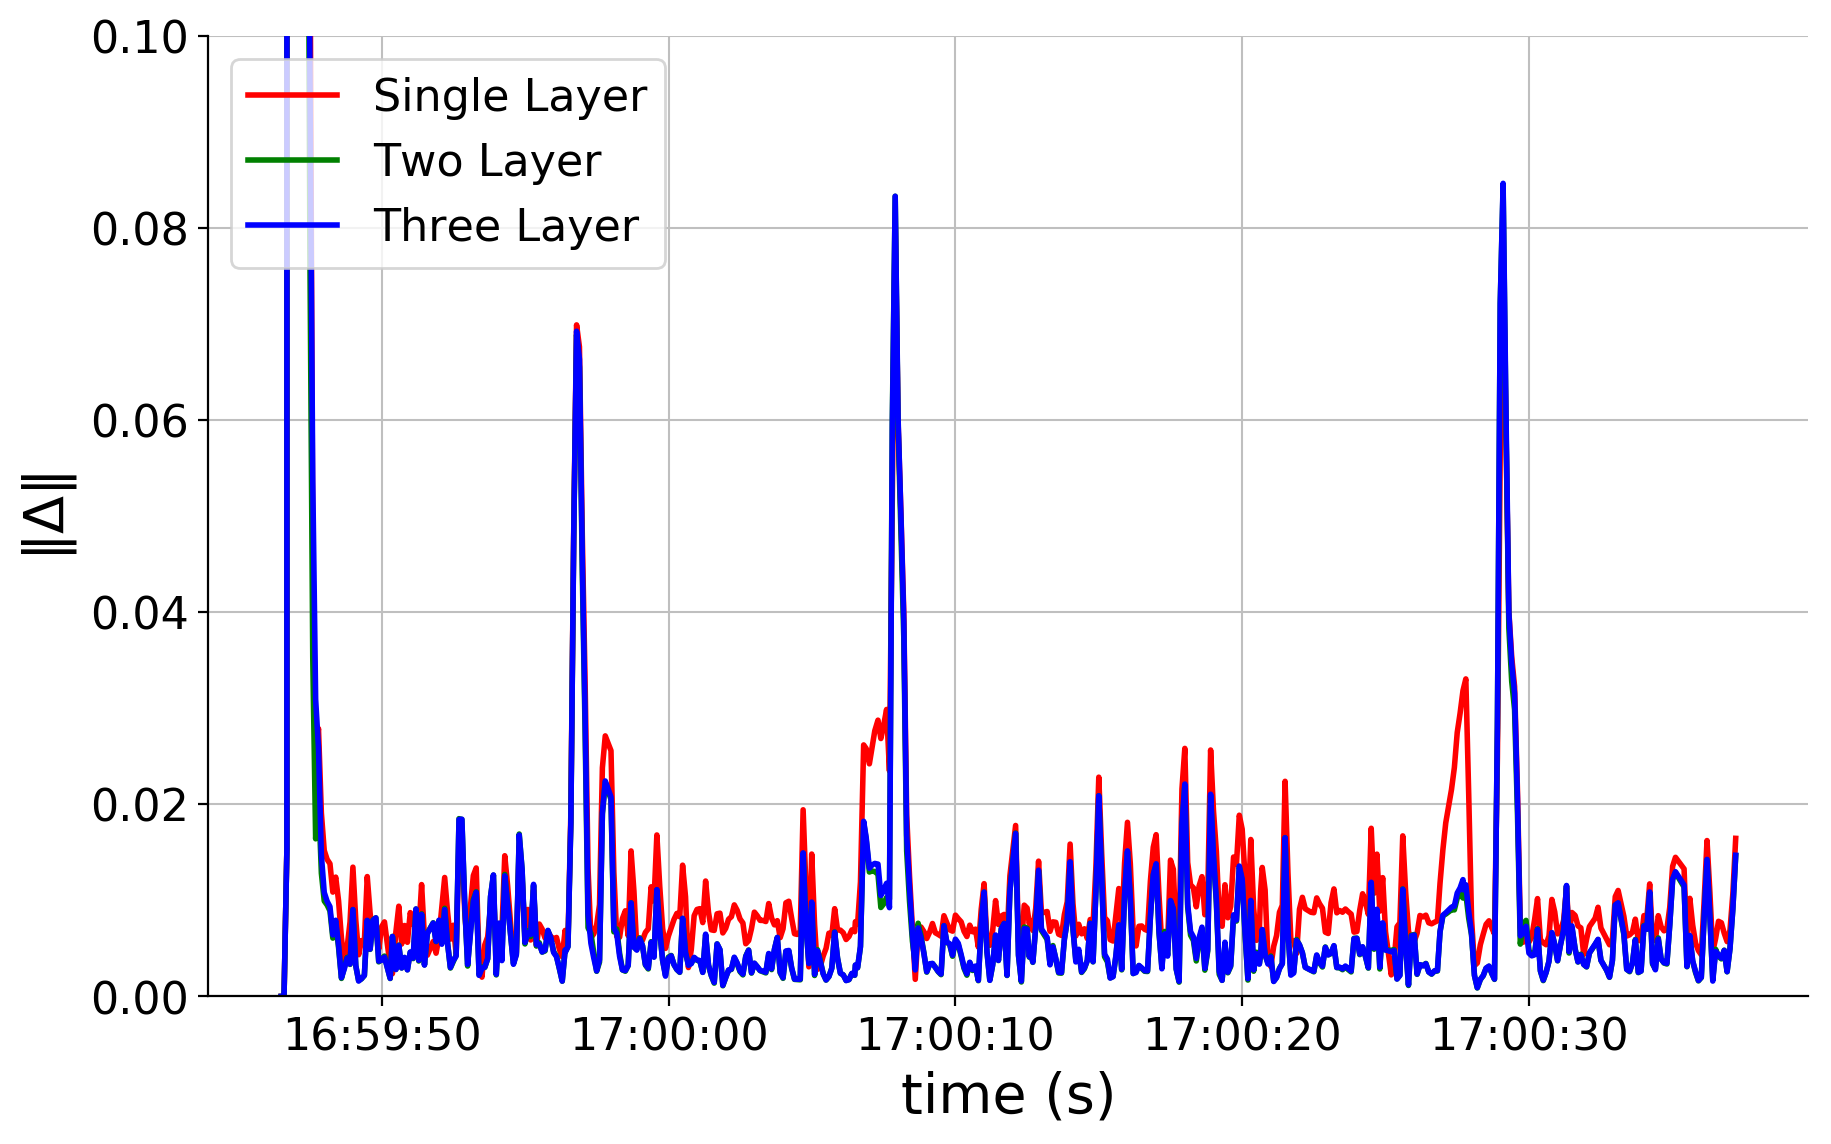

In [25]:
plt.figure(figsize=(10,6), dpi=200)
#Set the position of the axes
plt.axes([0.15,0.15,.8,.8])

ax = plt.gca()
#Title
ax.set_ylabel('$\Vert\Delta\Vert$',fontsize=20)
ax.set_xlabel('time (s)',fontsize=20)
#Make invisible some axes in order to appreciate better the subplot
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Different linestyles
plt.plot_date(inputIX[1:xlim+1],Loss1[:xlim],'red',linewidth=2,linestyle='-',label='Single Layer');
plt.plot_date(inputIX[1:xlim+1],Loss2[:xlim],'green',linewidth=2,linestyle='-',label='Two Layer');
plt.plot_date(inputIX[1:xlim+1],Loss3[:xlim],'blue',linewidth=2,linestyle='-',label='Three Layer');
#Legend
plt.legend(loc='upper left',frameon=True,fontsize=16)

plt.ylim(0, 0.1)
#plt.xlim(0, 30);
#Selecte the thicks we are gone to use in the plot
#plt.xticks(np.linspace(0,30,11,endpoint=True))
#ax.xaxis.set_major_locator(plt.MultipleLocator(2.0))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
#ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')


ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
#ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
#Change parameters of the axis thicks
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)


#plt.axes([0.45,0.5,0.4,0.4])
#ax2 = plt.gca()
#ax2.grid(which='major',axis='x',linewidth=0.25,linestyle='-',color='0.75')
#ax2.grid(which='major',axis='y',linewidth=0.25,linestyle='-',color='0.75')
#plt.plot(Time[0,:-3],Loss2[2:],'green',linewidth=7,linestyle='-',label='Two Layer');
#plt.plot(Time[0,:-3],Loss3[2:],'blue',linewidth=7,linestyle='-',label='Three Layer');
#plt.ylim(0, 1.5);
#plt.xlim(3, 5);
#plt.xticks(np.linspace(3,5,6,endpoint=True))
#plt.yticks(np.linspace(0,0.2,3,endpoint=True))
#for label in ax2.get_xticklabels() + ax2.get_yticklabels():
#    label.set_fontsize(16)
#Set the label


plt.savefig("ErrorDifferenceSimulator.png",dpi=200)
plt.show()

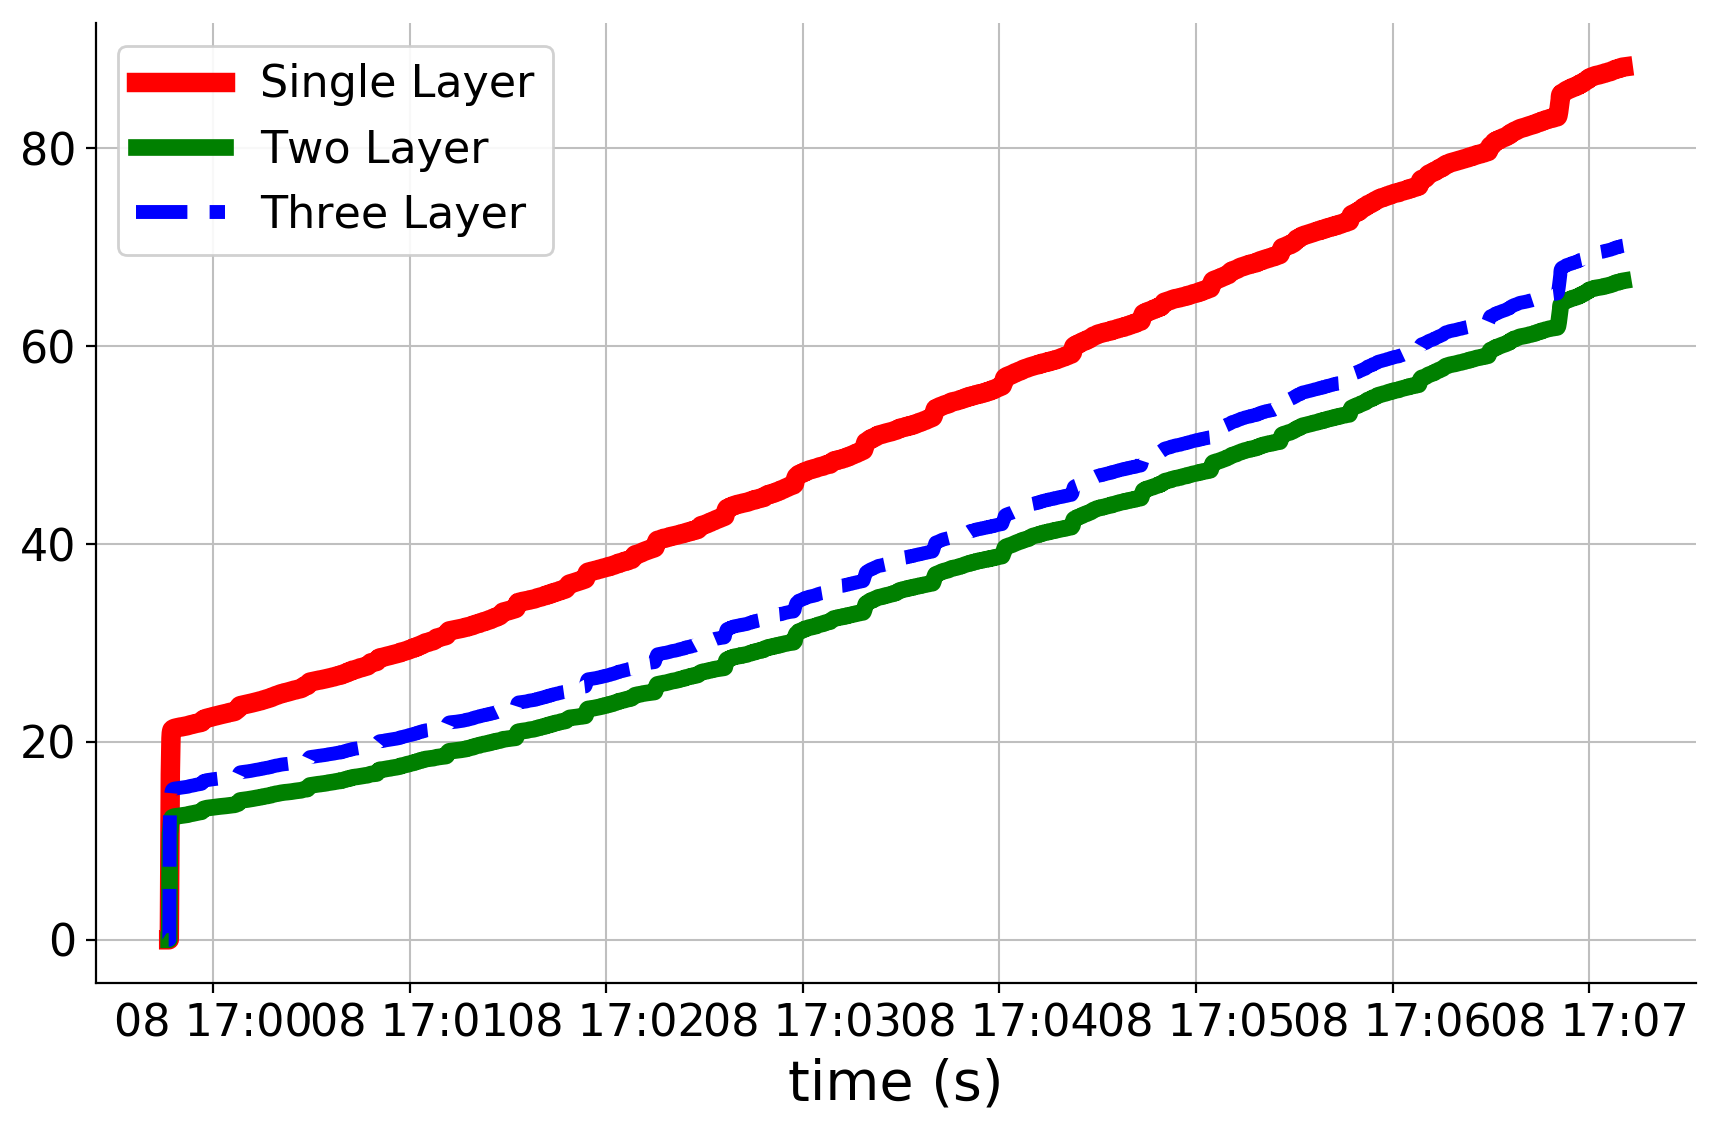

In [26]:
AccumLoss1=np.cumsum(Loss1)
AccumLoss2=np.cumsum(Loss2)
AccumLoss3=np.cumsum(Loss3)
#Using a 8 per 6 points figure with 100 points per inch
plt.figure(figsize=(10,6), dpi=200)

#Set the position of the axes
plt.axes([0.15,0.1,0.8,0.8])

ax = plt.gca()
#Title
#ax.set_ylabel(r'$\displaystyle\int_0^{t}\Vert \Delta \Vert d\tau$',fontsize=20)
ax.set_xlabel('time (s)',fontsize=20)
#Make invisible some axes in order to appreciate better the subplot
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#Different linestyles
plt.plot_date(inputIX[1:],AccumLoss1,'red',linewidth=7,linestyle='-',label='Single Layer');
plt.plot_date(inputIX[1:],AccumLoss2,'g',linewidth=6,linestyle='-',label='Two Layer');
plt.plot_date(inputIX[1:],AccumLoss3,'b',linewidth=5,linestyle='--',label='Three Layer');

#plt.fill_between(time, AccumLoss1,color='red')
#plt.fill_between(time, AccumLoss2,color='yellow')
#plt.fill_between(time, AccumLoss3,color='blue')
#Legend
plt.legend(loc='upper left',frameon=True,fontsize=16,framealpha=0.9)

#plt.ylim(0, 120);
#plt.xlim(0, 30);
#Selecte the thicks we are gone to use in the plot
#plt.xticks(np.linspace(0,10,11,endpoint=True))
#ax.xaxis.set_major_locator(plt.MultipleLocator(2.0))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
#ax.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')


ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
#ax.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')
#Change parameters of the axis thicks
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
##############################################################################################
#plt.axes([0.25,0.6,0.25,0.3])

#ax2 = plt.gca()
#ax2.grid(which='major',axis='x',linewidth=0.25,linestyle='-',color='0.75')
#ax2.grid(which='major',axis='y',linewidth=0.25,linestyle='-',color='0.75')

#plt.plot(time,AccumLoss1,'red',linewidth=7,linestyle='-',label='Single Layer');
#plt.plot(time,AccumLoss2,'g',linewidth=6,linestyle='-',label='Two Layer');
#plt.plot(time,AccumLoss3,'b',linewidth=5,linestyle='--',label='Three Layer');

#plt.fill_between(time, AccumLoss1,color='red')
#plt.fill_between(time, AccumLoss2,color='yellow')
#plt.fill_between(time, AccumLoss3,color='blue')

#plt.ylim(105, 112);
#plt.xlim(28, 30);
#plt.xticks(np.linspace(19.9,19.99,3,endpoint=True))
#plt.yticks(np.linspace(65,69,4,endpoint=True))
#for label in ax2.get_xticklabels() + ax2.get_yticklabels():
#    label.set_fontsize(16)
#    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))


#ax2.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
#ax2.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')


plt.savefig("AccumulativeErrorSimulator.png",dpi=200)
plt.show()